# Math 428 - Homework for 04/17/19

## Demonstrating Numerical Instability

$$\frac{dy}{dx}=30(cos(x)-y)+sin(x), y(0)=0$$

$$h_{max}=\frac{-2}{\frac{\partial f}{\partial y}(y_i)}$$

For the given $f(x, y)$...

$$\frac{\partial f}{\partial y}=-30$$

### Implementation of the Euler Fixed-Step method

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Euler method of approximating ODEs
def euler_ode(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = h * dy_dx(x_n, y_n)
        x.append(x_bounds[0] + i * h)
        y.append(y_n + k1)
        
    return x, y

# Function to find the maximum step size to stay stable
def find_h_max(partial_df_dy, initial=[0, 0]):
    return abs(-2 / (partial_df_dy(initial[0], initial[1])))

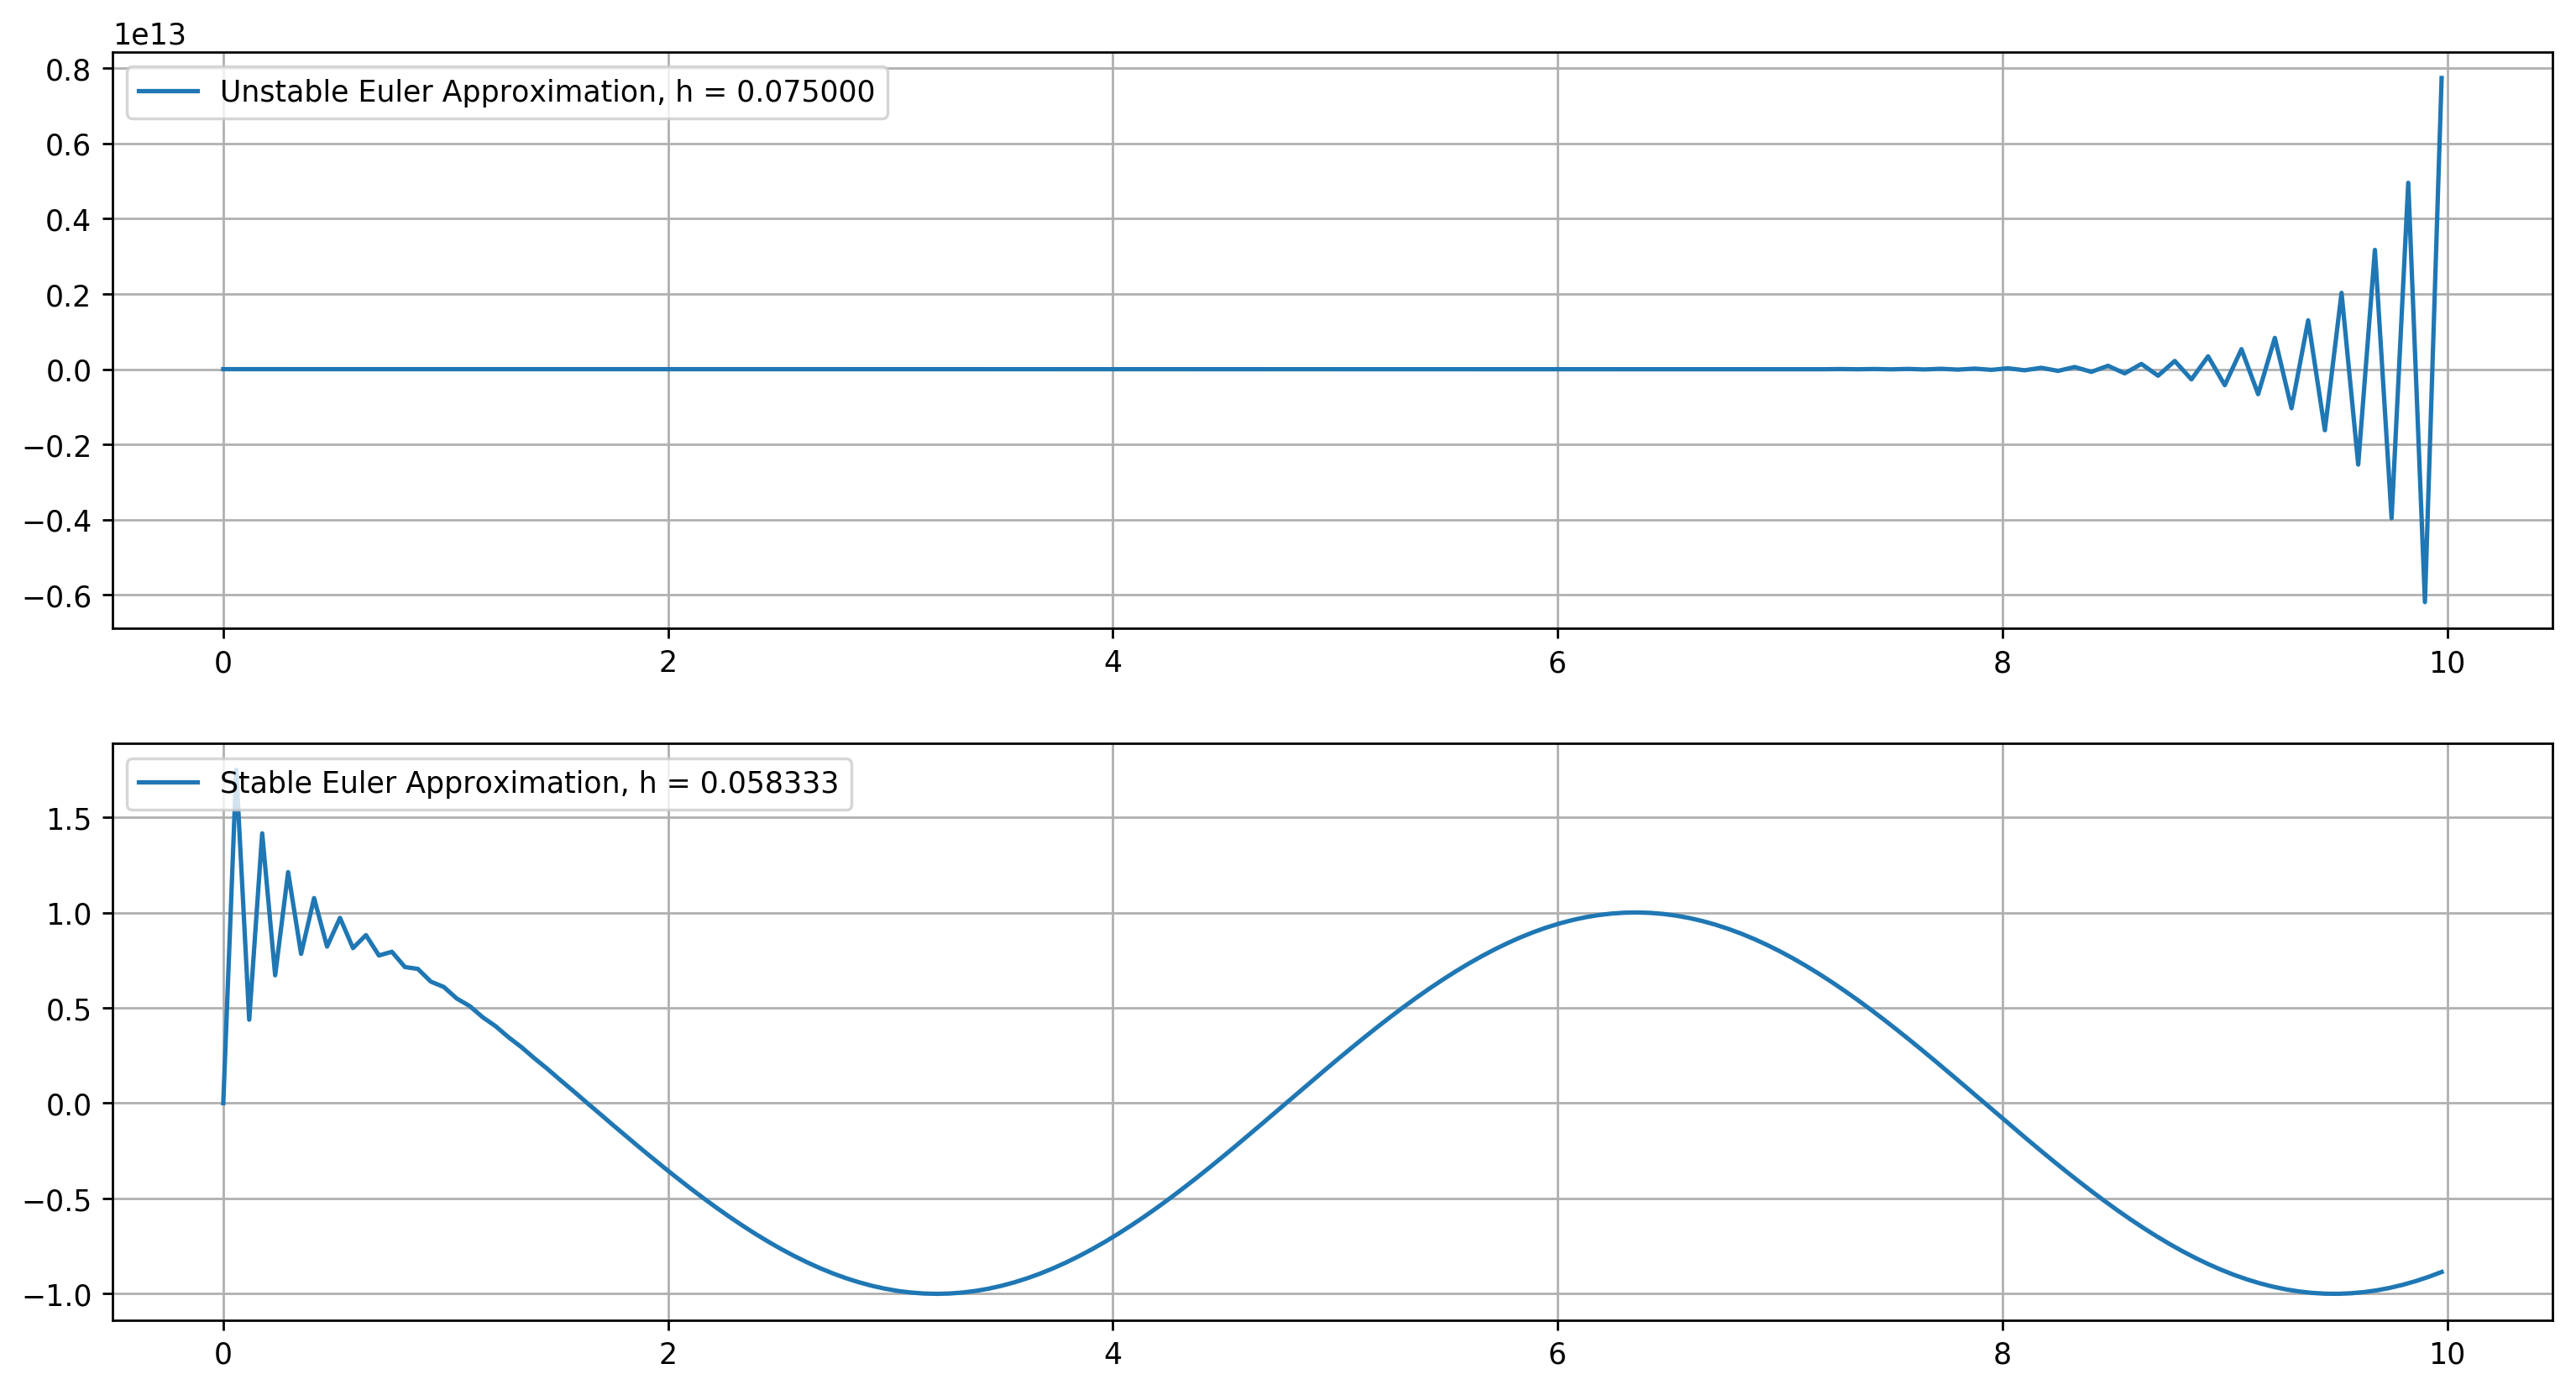

In [39]:
x_range = [0, 10]

# Function defintion of the given differential equation
def dy_dx(x, y):
    return 30 * (np.cos(x) - y) + np.sin(x)

# Function defintion of the partial df/dy
def partial_df_dy(x, y):
    return -30

# Find the range of y-values over the range 
h_max = find_h_max(partial_df_dy, [0, 0])
h_unstable = h_max * 9 / 8 # Round both values to deviate from h_max slightly
h_stable = h_max * 7 / 8

x_unstable, y_unstable = euler_ode(dy_dx, [0, 0], x_range, h_unstable)
x_stable, y_stable = euler_ode(dy_dx, [0, 0], x_range, h_stable)
plt.figure(figsize=(15, 8), dpi=250)
plt.subplot(211)
plt.plot(x_unstable, y_unstable, label="Unstable Euler Approximation, h = %f" % h_unstable)
plt.grid(True)
plt.legend(loc='upper left')
plt.subplot(212)
plt.plot(x_stable, y_stable, label="Stable Euler Approximation, h = %f" % h_stable)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

The first graph shows how the euler method fails when using a step size larger than the calculated $h_{max}$. The oscillation in the first graph is a result of the method's numerical instability, and how the error is accumulated between steps. The second graph, on the other hand, utilizes a step size smaller than the calculated maximum step size and because of this, there is no accumulated error and the method is stable.